In [190]:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb

'''Jupyter Markdown Cheat Sheet'''
# https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
# https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

'Jupyter Markdown Cheat Sheet'

In [193]:
def time_to_string_display(time):
    string = str(time.year) + '-'+ time.strftime('%B') + '-' + str(time.day)
    return string

<div class="alert alert-block alert-info">
<br>
<font size = "+6", color = 'black'> <center> Processing</center></font>
<br>

<font color = 'black'> <center> </center></font>

</div>


<div class="alert alert-block alert-success"> <center> <font color = 'black'> Reading In</font></center></div>

In [2]:
'''Opening the RMM from observations'''
obs = xr.open_dataset('rmm_obs.nc')
obs

<xarray.Dataset>
Dimensions:    (time: 16592)
Coordinates:
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-11-03
Data variables:
    phase      (time) int64 ...
    amplitude  (time) float64 ...
    rmm1       (time) float64 ...
    rmm2       (time) float64 ...

In [4]:
'''The RMM from ACCESS-S that I have pieced together in the file: RMM_ACCESS-S'''
access = xr.open_dataset('rmm_access.nc')
access

<xarray.Dataset>
Dimensions:    (ensemble: 12, time: 8401)
Coordinates:
  * ensemble   (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    phase      (ensemble, time) float32 ...
    amplitude  (ensemble, time) float32 ...

In [5]:
'''The RMM from ACCESS-S that I have pieced together in the file: RMM_ACCESS-S'''
access_raw = xr.open_dataset('rmm_access_raw.nc')
access_raw

<xarray.Dataset>
Dimensions:   (ensemble: 12, time: 8401)
Coordinates:
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    rmm1      (ensemble, time) float32 ...
    rmm2      (ensemble, time) float32 ...

<div class="alert alert-block alert-success"> <center> <font color = 'black'> Mode</font></center></div>

In [6]:
'''This function calculates the mode accross each ensemble at each time step'''
def mode_of_ensemble(data):
    import scipy.stats as ss
    mode_array = ss.mode(data)
    mode_vals = mode_array[0][0]
    
    return mode_vals

<font color  = 'green' size = "+1"><center> Mode of Phase </center></font>

In [252]:
access_phase_mode_raw = mode_of_ensemble(access.phase.values)

'''6. Making into an xarray file'''
access_phase_mode = xr.Dataset(
{'mode':(('time'), access_phase_mode_raw)},
{'time': access.time.values})

In [253]:
access_phase_mode

<xarray.Dataset>
Dimensions:  (time: 8401)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    mode     (time) float32 5.0 5.0 5.0 5.0 6.0 6.0 ... 5.0 4.0 5.0 5.0 6.0 6.0

<font color  = 'green' size = "+1"><center> Mode of RMM1 and RMM2 Values </center></font>

In [99]:
access_rmm1_mode_raw = mode_of_ensemble(access_raw.rmm1.values)
access_rmm2_mode_raw = mode_of_ensemble(access_raw.rmm2.values)

'''6. Making into an xarray file'''
access_rmm_mode = xr.Dataset(
{'rmm1':(('time'), access_rmm1_mode_raw),'rmm2':(('time'), access_rmm2_mode_raw)},
{'time': access.time.values})

In [102]:
access_rmm_mode

<xarray.Dataset>
Dimensions:  (time: 8401)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    rmm1     (time) float32 -0.043629244 0.14449462 ... -1.3578755 -1.6734625
    rmm2     (time) float32 -2.8861036 -2.7707157 ... -1.853012 -1.4126791

<div class="alert alert-block alert-success"> <center> <font color = 'black'>Mean</font></center></div>

In [9]:
access_mean = access.mean(dim = 'ensemble')
access_mean

<xarray.Dataset>
Dimensions:    (time: 8401)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    phase      (time) float32 4.9166665 5.0 5.0 5.1666665 ... 4.5 5.5 5.25 5.0
    amplitude  (time) float32 2.364943 2.2993739 ... 1.2081329 1.1974882

In [132]:
access_rmm_mean = access_raw.mean(dim = 'ensemble')
access_rmm_mean

<xarray.Dataset>
Dimensions:  (time: 8401)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    rmm1     (time) float32 0.23690374 0.34527993 ... 0.37714657 0.36667958
    rmm2     (time) float32 -2.3476145 -2.270933 ... -0.35689566 -0.20879196

<div class="alert alert-block alert-success"> <center> <font color = 'black'>Time Matching</font></center></div>

In [10]:
'''Matching the tow so that they are the same length. The ACCESS-S file is much shorter'''
times = access.time.values
start = times[0]
end = times[-1]
start,end

obs_sub = obs.sel(time = slice(start, end))
obs_sub

<xarray.Dataset>
Dimensions:    (time: 8401)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    phase      (time) int64 ...
    amplitude  (time) float64 ...
    rmm1       (time) float64 ...
    rmm2       (time) float64 ...

<div class="alert alert-block alert-success"> <center> <font color = 'black'>Getting the points when the model was initialised</font></center></div>

In [184]:
time = access.time.values


# The time values are numpy times, which you can't do things like time.day to get the day. Thus, I have converted
# everything into pandas datetime
pd_time = [pd.to_datetime(i, format = '%YYYY%MM%dd') for i in time ] 


# This isn't used anymore. But keeping just in case
str_time = [str(pd_time[i].year) + str(pd_time[i].month) + str(pd_time[i].day) for i in range(len(pd_time))]

In [185]:
# This is finding out where everything is initialied from. ACCESS-S is initalised on the first day over every 
# month

inits = []
for point in pd_time:
    if point.day == 1: #If the day is the first of the month.
        inits.append(point)
        
inits = np.array(inits)
inits[:5]

array([Timestamp('1990-01-01 00:00:00'), Timestamp('1990-02-01 00:00:00'),
       Timestamp('1990-03-01 00:00:00'), Timestamp('1990-04-01 00:00:00'),
       Timestamp('1990-05-01 00:00:00')], dtype=object)

<div class="alert alert-block alert-info">
<br>
<font size = "+6", color = 'black'> <center> Plotting </center></font>
<br>

<font color = 'black'> <center> </center></font>

</div>


# Circular

In [21]:
print('Packages used for this plot')

%matplotlib inline
import io
import os
import sys
import calendar
import numpy as np
import pandas as pd
import xarray as xr
import urllib
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from datetime import datetime
from dateutil.parser import parse as dparse
import calendar
from IPython.display import HTML, Image, IFrame




Packages used for this plot


In [255]:
import calendar

In [286]:
'''Subsetting both for the same period of 40 days'''
start_month_num = 2
init = inits[start_month_num]
# Only showing the values for 1 month (up until next initialisation). 
num_in_month = calendar.monthrange(init.year, init.month)[1] # THis gets the number of days in that month
final = init + pd.to_timedelta(str(num_in_month - 1) + 'D') # -1 due to already starting at the first of that month
# final = init + pd.to_timedelta('40D')


##### Observed
rmm_df = obs_sub.drop({'phase','amplitude'}).to_dataframe()
rmm_period_df = rmm_df.loc[init:final]

##### ACCESS-S

# access_df = access_rmm_mode.to_dataframe()
access_df = access_rmm_mean.to_dataframe()
access_period_df = access_df.loc[init:final]

access_raw_period = access_raw.sel(time = slice(init,final))

In [287]:
print(init, final)

1990-03-01 00:00:00 1990-03-31 00:00:00


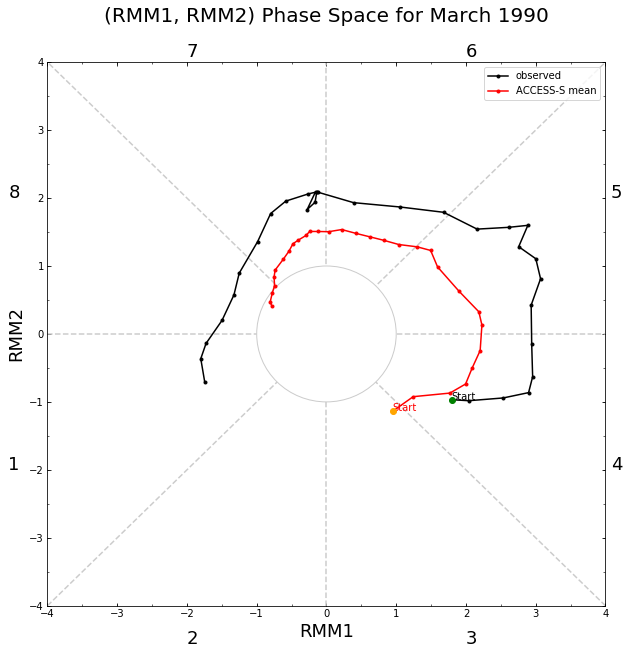

In [288]:
'''~~~~~~~~~~~~~~ The Plot'''
f, ax = plt.subplots(figsize=(10,10))

# Setting up the polot
title = '(RMM1, RMM2) Phase Space for ' + str(init.strftime('%B')) + ' ' + str(init.year)
# title = '(RMM1, RMM2) Phase Space for ' + time_to_string_display(init) + ' to ' + time_to_string_display(final)
ax.set_title(title, pad = 40, fontsize = 20)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # Minor locators
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.plot([-4,4],[-4,4], color='.8', ls='--') # THe dashed diagonal lines that define the phase
ax.plot([4, -4],[-4,4], color='.8', ls='--')
ax.axhline(0, color='.8', ls='--')
ax.axvline(0, color='.8', ls='--')
circ = plt.Circle((0, 0), radius=1, edgecolor='0.8', facecolor='w', zorder=3) # Circle. zorder = 3 to be over 
ax.add_patch(circ)                                                            # the dashed lines

'''~~~~~~~~~~~~~~ Plotting'''
ax.plot(rmm_period_df.rmm1.values, rmm_period_df.rmm2.values, zorder=4, label = 'observed',
        c='k', marker = 'o', markersize = 3)


ax.plot(access_period_df.rmm1.values, access_period_df.rmm2.values, zorder=4, label = 'ACCESS-S mean',
        c='r', marker = 'o', markersize = 3)


'''~~~~~~~~~~~~~~ Labelling start and end points'''
ax.annotate('Start', xy = (rmm_period_df.rmm1.values[0], rmm_period_df.rmm2.values[0]))
ax.scatter(rmm_period_df.rmm1.values[0], rmm_period_df.rmm2.values[0], color = 'green', zorder = 5)

ax.annotate('Start', xy = (access_period_df.rmm1.values[0], access_period_df.rmm2.values[0]), color = 'r')
ax.scatter(access_period_df.rmm1.values[0], access_period_df.rmm2.values[0], color = 'orange', zorder = 5)

'''~~~~~~~~~~~~~~ X and Y label'''

ax.set_ylabel('RMM2', fontsize=18.)
ax.set_xlabel('RMM1', fontsize=18.)


'''~~~~~~~~~~~~~~ Annotation the phase'''
ax.annotate('5',xy = (1.01,0.75), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('6',xy = (0.75,1.01), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('7',xy = (0.25,1.01), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('8',xy = (-0.07,0.75), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('1',xy = (-0.07,0.25), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('2',xy = (0.25,-0.07), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('3',xy = (0.75,-0.07), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('4',xy = (1.01,0.25), fontsize= 18, xycoords = 'axes fraction');

ax.legend()
plt.savefig('Plots/' + title + '.png', bbox_inches = 'tight', dpi = 300)

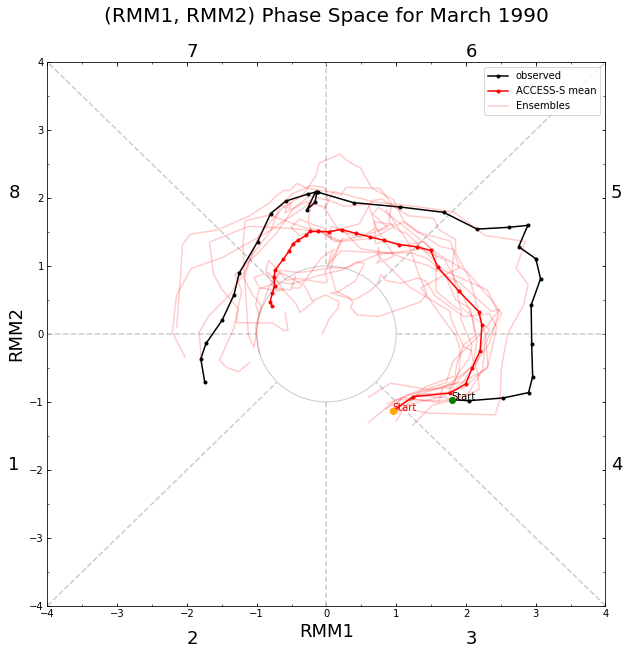

In [290]:
'''~~~~~~~~~~~~~~ The Plot'''
f, ax = plt.subplots(figsize=(10,10))

# Setting up the polot
title = '(RMM1, RMM2) Phase Space for ' + str(init.strftime('%B')) + ' ' + str(init.year)
# title = '(RMM1, RMM2) Phase Space for ' + time_to_string_display(init) + ' to ' + time_to_string_display(final)
ax.set_title(title, pad = 40, fontsize = 20)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # Minor locators
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.plot([-4,4],[-4,4], color='.8', ls='--') # THe dashed diagonal lines that define the phase
ax.plot([4, -4],[-4,4], color='.8', ls='--')
ax.axhline(0, color='.8', ls='--')
ax.axvline(0, color='.8', ls='--')
circ = plt.Circle((0, 0), radius=1, edgecolor='0.8', facecolor='w', zorder=3) # Circle. zorder = 3 to be over 
ax.add_patch(circ)                                                            # the dashed lines

'''~~~~~~~~~~~~~~ Plotting'''
ax.plot(rmm_period_df.rmm1.values, rmm_period_df.rmm2.values, zorder=4, label = 'observed',
        c='k', marker = 'o', markersize = 3)


ax.plot(access_period_df.rmm1.values, access_period_df.rmm2.values, zorder=4, label = 'ACCESS-S mean',
        c='r', marker = 'o', markersize = 3)

for ensemble in access_raw_period.ensemble.values:
    single_ensemble = access_raw_period.sel(ensemble = ensemble)
    
    # This little chunk can be used to isolate ensemble members
#     if ensemble == 11:
#         color = 'r'
#     else:
#         color = 'b'
    color = 'r'
    if ensemble == 0:
        label = 'Ensembles'
        ax.plot(single_ensemble.rmm1.values, single_ensemble.rmm2.values, zorder = 4, c = color, alpha = 0.2, 
            label = label)
    else:
        ax.plot(single_ensemble.rmm1.values, single_ensemble.rmm2.values, zorder = 4, c = color, alpha = 0.2)
   


'''~~~~~~~~~~~~~~ Labelling start and end points'''
ax.annotate('Start', xy = (rmm_period_df.rmm1.values[0], rmm_period_df.rmm2.values[0]))
ax.scatter(rmm_period_df.rmm1.values[0], rmm_period_df.rmm2.values[0], color = 'green', zorder = 5)

ax.annotate('Start', xy = (access_period_df.rmm1.values[0], access_period_df.rmm2.values[0]), color = 'r')
ax.scatter(access_period_df.rmm1.values[0], access_period_df.rmm2.values[0], color = 'orange', zorder = 5)

'''~~~~~~~~~~~~~~ X and Y label'''

ax.set_ylabel('RMM2', fontsize=18.)
ax.set_xlabel('RMM1', fontsize=18.)


'''~~~~~~~~~~~~~~ Annotation the phase'''
ax.annotate('5',xy = (1.01,0.75), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('6',xy = (0.75,1.01), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('7',xy = (0.25,1.01), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('8',xy = (-0.07,0.75), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('1',xy = (-0.07,0.25), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('2',xy = (0.25,-0.07), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('3',xy = (0.75,-0.07), fontsize= 18, xycoords = 'axes fraction');
ax.annotate('4',xy = (1.01,0.25), fontsize= 18, xycoords = 'axes fraction');

ax.legend()


plt.savefig('Plots/' + title + ' (spaghetti).png', bbox_inches = 'tight', dpi = 300)

# Means and Modes

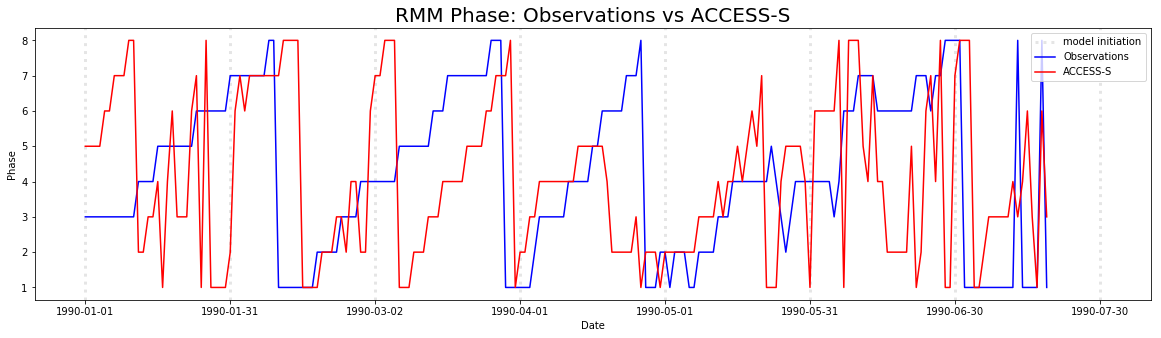

In [74]:

fig,ax = plt.subplots(1,1,figsize = (20, 5))
max_len = len(obs_sub.phase.values)
extent = 200#int(max_len/20)

num_days_each_month = [31,28,31,30,31,30,31,31,30,31,30,31]
inits = np.arange(0,extent + 30, 30)
for init in inits:
    if init == 0:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',
                    label = 'model initiation',zorder = -100)
    else:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',zorder = -100)


ax.plot(obs_sub.isel(time = slice(0,extent)).phase, color = 'blue', label = 'Observations')
ax.plot(access_phase_mode.isel(time = slice(0,extent)).mode, color = 'red', label = 'ACCESS-S')

ax.legend()
title = 'RMM Phase: Observations vs ACCESS-S'
ax.set_title(title, size = 20)
ax.set_ylabel('Phase')
ax.set_xlabel('Date')

# tick_locs = np.round(np.linspace(0, extent,10)).astype(int).tolist()
tick_locs = inits
dates = obs_sub.isel(time = tick_locs).time.values
dates = np.array(dates, dtype = 'datetime64[D]')

ax.set_xticks(tick_locs)
ax.set_xticklabels(dates);

fig.savefig(title + '.png', bbox_inches = 'tight', dpi = 300)

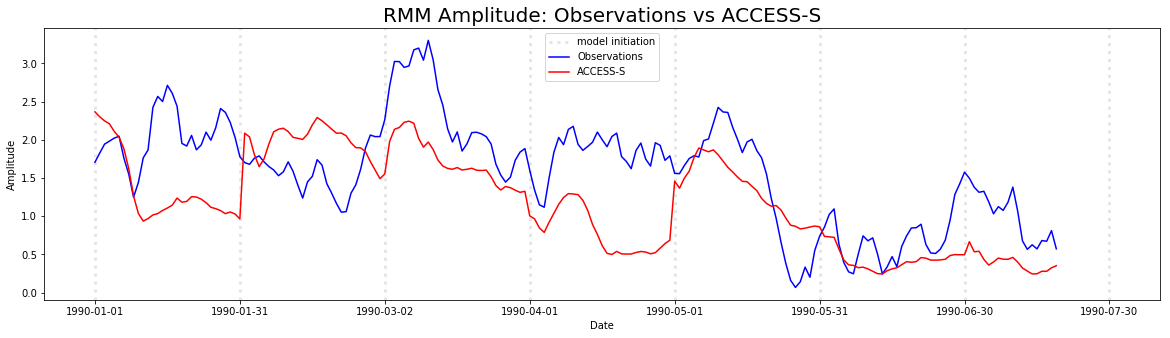

In [9]:

fig,ax = plt.subplots(1,1,figsize = (20, 5))
max_len = len(obs_sub.phase.values)
extent = 200#int(max_len/20)

num_days_each_month = [31,28,31,30,31,30,31,31,30,31,30,31]
inits = np.arange(0,extent + 30, 30)
for init in inits:
    if init == 0:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',
                    label = 'model initiation',zorder = -100)
    else:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',zorder = -100)


ax.plot(obs_sub.isel(time = slice(0,extent)).amplitude, color = 'blue', label = 'Observations')
ax.plot(access_mean.isel(time = slice(0,extent)).amplitude, color = 'red', label = 'ACCESS-S')

ax.legend()
title = 'RMM Amplitude: Observations vs ACCESS-S'
ax.set_title(title, size = 20)
ax.set_ylabel('Amplitude')
ax.set_xlabel('Date')

# tick_locs = np.round(np.linspace(0, extent,10)).astype(int).tolist()
tick_locs = inits
dates = obs_sub.isel(time = tick_locs).time.values
dates = np.array(dates, dtype = 'datetime64[D]')

ax.set_xticks(tick_locs)
ax.set_xticklabels(dates);

fig.savefig(title + '.png', bbox_inches = 'tight', dpi = 300)

In [16]:
np.corrcoef(obs_sub.phase, access_mean.phase)

array([[1.        , 0.17723135],
       [0.17723135, 1.        ]])

# Spaghetti

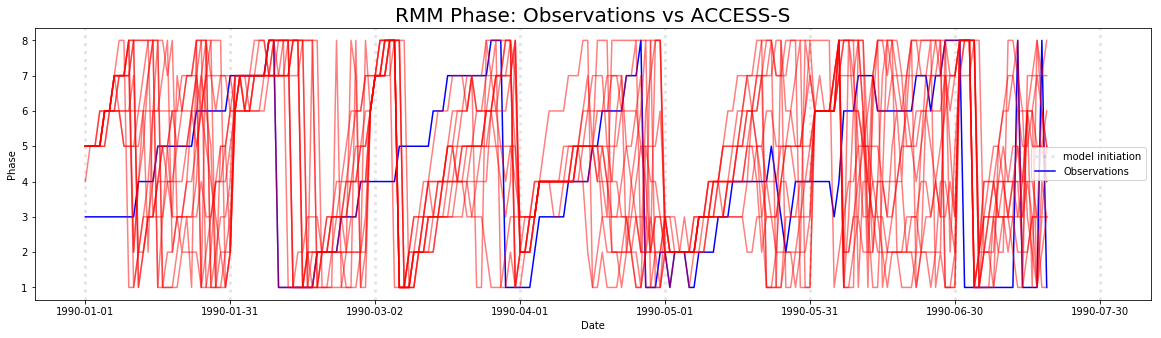

In [29]:

fig,ax = plt.subplots(1,1,figsize = (20, 5))
max_len = len(obs_sub.phase.values)
extent = 200#int(max_len/20)

num_days_each_month = [31,28,31,30,31,30,31,31,30,31,30,31]
inits = np.arange(0,extent + 30, 30)
for init in inits:
    if init == 0:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',
                    label = 'model initiation',zorder = -100)
    else:
        ax.axvline(init, color = 'k', linewidth = 3,alpha = 0.1, linestyle = ':',zorder = -100)


ax.plot(obs_sub.isel(time = slice(0,extent)).phase, color = 'blue', label = 'Observations')

access_sub = access.isel(time = slice(0,extent))
for ensemble in access.ensemble.values:
    ax.plot(access_sub.sel(ensemble = ensemble).phase.values,color = 'r', alpha = 0.5)

    
    
    
# ax.plot(access_mean.isel(time = slice(0,extent)).phase, color = 'red', label = 'ACCESS-S')

ax.legend()
title = 'RMM Phase: Observations vs ACCESS-S'
ax.set_title(title, size = 20)
ax.set_ylabel('Phase')
ax.set_xlabel('Date')

# tick_locs = np.round(np.linspace(0, extent,10)).astype(int).tolist()
tick_locs = inits
dates = obs_sub.isel(time = tick_locs).time.values
dates = np.array(dates, dtype = 'datetime64[D]')

ax.set_xticks(tick_locs)
ax.set_xticklabels(dates);

# fig.savefig(title + '.png', bbox_inches = 'tight', dpi = 300)

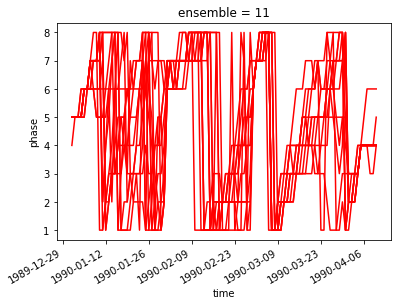

In [27]:
extent = 100
access_sub = access.isel(time = slice(0,extent))
for ensemble in access.ensemble.values:
    access_sub.sel(ensemble = ensemble).phase.plot(color = 'r')